## Лабораторная работа №1 | Вариант 5

Выполнил: Воронухин Н.А.

### 1. Numpy

In [159]:
import numpy as np

1. Создайте единичную матрицу размером 3х3

In [160]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

2. Создайте кастомный dtype который описывает цвет состоящий из 4х unsigned bytes(RGBA пиксель)

In [161]:
dt = np.dtype([
    ('R', 'B'),
    ('G', 'B'),
    ('B', 'B'),
    ('A', 'B')
])

print(dt)
print(dt.fields)

[('R', 'u1'), ('G', 'u1'), ('B', 'u1'), ('A', 'u1')]
{'R': (dtype('uint8'), 0), 'G': (dtype('uint8'), 1), 'B': (dtype('uint8'), 2), 'A': (dtype('uint8'), 3)}


3. Как игнорировать все numpy warnings(не рекомендуем к использованию)?

In [162]:
np.seterr(all="ignore")

{'divide': 'ignore', 'over': 'ignore', 'under': 'ignore', 'invalid': 'ignore'}

4. Создайте случайный вектор размера 10 и отсортируйте его

In [163]:
arr = np.random.random(10)
print("Initial\n", arr)
arr.sort()
print("Sorted\n", arr)

Initial
 [0.83525953 0.48955779 0.3581485  0.61788968 0.7628018  0.7460243
 0.38067881 0.38158202 0.20492729 0.13987546]
Sorted
 [0.13987546 0.20492729 0.3581485  0.38067881 0.38158202 0.48955779
 0.61788968 0.7460243  0.7628018  0.83525953]


5. Создайте read-only массив(неизменяемый)

In [164]:
arr = np.zeros(3)
arr[0] = 1
print(arr)
arr.flags.writeable = False
try:
    arr[0] = 2
except Exception as err:
    print("!!!!ERR!!!: ", err)

[1. 0. 0.]
!!!!ERR!!!:  assignment destination is read-only


6. Рассмотрим случайную матрицу размером 10х2, представляющую декартовы координаты, преобразуем их в полярные координаты

In [165]:
cartesian = np.random.random((10, 2))
print("Cartesian coordinates (x, y): \n", cartesian)

polar = np.array([
    [
        np.sqrt(pair[0] ** 2 + pair[1] ** 2),
        np.arctan2(pair [1], pair[0])
    ] for pair in cartesian
])

print("\nPolar coordinates (rho, phi (rad)): \n", polar)


Cartesian coordinates (x, y): 
 [[0.03183946 0.82913104]
 [0.51810989 0.42993833]
 [0.75155382 0.49533656]
 [0.26477526 0.87139491]
 [0.20756916 0.11593085]
 [0.5248702  0.66721532]
 [0.70706435 0.15742938]
 [0.87995837 0.48636551]
 [0.17156981 0.91640652]
 [0.23135362 0.73906391]]

Polar coordinates (rho, phi (rad)): 
 [[0.82974215 1.53241419]
 [0.67326431 0.69266168]
 [0.90010636 0.58273418]
 [0.91073324 1.27580916]
 [0.23774969 0.50935844]
 [0.84891991 0.90424392]
 [0.72437836 0.21907858]
 [1.00542436 0.50492468]
 [0.93232886 1.38571869]
 [0.77442879 1.26742321]]


7. Создайте структурированный массив с координатами x и y, охватывающий область [0,1]x[0,1]

In [166]:

x, y = np.meshgrid(np.linspace(0, 1, 6), np.linspace(0, 1, 6))
grid = np.rec.fromarrays([x.ravel(), y.ravel()], names='x, y')

print(grid)

[(0. , 0. ) (0.2, 0. ) (0.4, 0. ) (0.6, 0. ) (0.8, 0. ) (1. , 0. )
 (0. , 0.2) (0.2, 0.2) (0.4, 0.2) (0.6, 0.2) (0.8, 0.2) (1. , 0.2)
 (0. , 0.4) (0.2, 0.4) (0.4, 0.4) (0.6, 0.4) (0.8, 0.4) (1. , 0.4)
 (0. , 0.6) (0.2, 0.6) (0.4, 0.6) (0.6, 0.6) (0.8, 0.6) (1. , 0.6)
 (0. , 0.8) (0.2, 0.8) (0.4, 0.8) (0.6, 0.8) (0.8, 0.8) (1. , 0.8)
 (0. , 1. ) (0.2, 1. ) (0.4, 1. ) (0.6, 1. ) (0.8, 1. ) (1. , 1. )]


8. Учитывая два массива X и Y, постройте матрицу Коши $C$ ($C_{ij} =\frac{1}{x_i - y_j}$)

In [167]:
x = np.random.normal(size=(5))
y = np.random.normal(size=(5))
print("x: \n", x)
print("y: \n", y)

cauchy = 1 / (x[:, None] - y[None, :])  # broadcasting
print("Cauchy: \n", cauchy)

x: 
 [0.76739435 0.22912186 0.91256922 0.4035878  0.38146285]
y: 
 [ 1.39197011  1.63584415  1.62300951 -1.11042922 -1.62953947]
Cauchy: 
 [[-1.60108679 -1.15147703 -1.16874974  0.53253139  0.41719967]
 [-0.85995744 -0.71087236 -0.71741794  0.74651875  0.53802163]
 [-2.08593691 -1.38260011 -1.40757783  0.49431575  0.39337421]
 [-1.01175425 -0.81151945 -0.82006085  0.66049456  0.49185312]
 [-0.989602   -0.79720576 -0.80544697  0.67028978  0.49726447]]


9. Как конвертировать массив float(32 bit) к массиву целых чисел (integer 32 bit) in place?

In [168]:
print(np.array([1.3, 1.4, 5.0, 324.643], dtype='f4').view('i4'))
print(np.array([1.3, 1.4, 5.0, 324.643], dtype='f4').astype('i4', copy=False))


[1067869798 1068708659 1084227584 1134711374]
[  1   1   5 324]


10. Как случайно заменить p элементов в 2D массиве?

In [169]:
rng = np.random.default_rng()

arr = rng.random((2, 3))
print("Initial: \n", arr)

count = 2
arr.flat[rng.choice(arr.size, count, replace=False)] = rng.random(count)

print("Changed:\n",arr)

Initial: 
 [[0.48552824 0.1894905  0.2623313 ]
 [0.3917607  0.53254618 0.76559019]]
Changed:
 [[0.48552824 0.58195229 0.2623313 ]
 [0.3917607  0.53254618 0.80066151]]


### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом 

Классический начальный набор данных - данные пассажиров титаника.

Файл: `data.csv`

```
PassangerId - уникальный номер пассажира
Survived - выжил человек или нет
Pclass - класс обслуживания
Name - имя человека, обращение к ней/нему
Sex - пол человека
Age - возраст на момент крушения
SibSp - количество братьев и сестер / супругов на борту "Титаника"
Parch - количество родителей / детей на борту "Титаника"
Ticket - номер билета
Fare - стоимость проезда для пассажиров
Cabin - каюта
Embarked - причал отбытия. C = Cherbourg Q = Queenstown S = Southampton
```

In [170]:
import pandas as pd

In [171]:
# Load dataset here
DATA_PATH = 'data.csv'
data_set = pd.read_csv(DATA_PATH)

1. Узнайте сколько было на борту человек

In [172]:
print("Number of passengers: ", data_set.shape[0])

Number of passengers:  891


2. Какой медианный и средний возраста пассажиров

In [173]:
print(f"Mean age: {data_set["Age"].mean()}\nMeadian age {data_set["Age"].median()}")


Mean age: 29.69911764705882
Meadian age 28.0


3. Посчитайте процент выживаемости детей(до 16 лет) и взрослых

In [174]:
# data_clean = data_set.dropna(subset=['Age', 'Survived'])
# часть записей не имеют заполненого поля
# но mean это учитывает
print(f"Child survival rate (under 16): {data_set[data_set['Age'] < 16]['Survived'].mean() * 100:.2f}%")
print(f"Adult survival rate (16+): {data_set[data_set['Age'] >= 16]['Survived'].mean() * 100:.2f}%")

Child survival rate (under 16): 59.04%
Adult survival rate (16+): 38.19%


4. Верна ли гипотеза, что женщины и дети сажались в шлюпки первыми и выживали больше?

In [175]:
print(f"Survival rate by {(data_set[data_set['Age'] >= 16].groupby(['Sex'])['Survived'].mean() * 100).map('{:.2f}%'.format).to_string()}\n")
print(f"Survival rate by {
    (data_set.groupby(
            data_set['Age'].apply(lambda x: 'Child' if x < 16 else 'Adult')
        )['Survived'].mean() * 100
    ).map('{:.2f}%'.format)
    .to_string()}\n"
)
# чиселки больше, но не обязательно из-за приоритета в шлюпках

Survival rate by Sex
female    77.52%
male      17.43%

Survival rate by Age
Adult    36.26%
Child    59.04%



5. Зависит ли выживаемость от класса обслуживания?

In [176]:
print(f"Survival rate by {(data_set.groupby('Pclass')['Survived'].mean() * 100).map('{:.2f}%'.format).to_string()}\n")
# как то зависит

Survival rate by Pclass
1    62.96%
2    47.28%
3    24.24%



6. Посчитайте средний возраст умерших женщин и мужчин

In [177]:
print(f"Average age at death by {(
            data_set[data_set['Survived'] == 0].groupby('Sex')['Age'].mean()
        ).map('{:.2f} y/o'.format)
    .to_string()}\n")

Average age at death by Sex
female    25.05 y/o
male      31.62 y/o



7. Различается ли процент выживаемости пассажиров с хотя бы одним родственником на борту и одиночек?

In [178]:
grouped = data_set.groupby(data_set['Parch'] + data_set['SibSp'] > 0)['Survived'].mean() * 100
grouped.index = ['Alone', 'With relatives']

print("Survival rate by family presence on board:")
print(grouped.map('{:.2f}%'.format).to_string())

Survival rate by family presence on board:
Alone             30.35%
With relatives    50.56%


8. Различается ли средняя стоимость билета у умерших и выживших пассажиров?

In [179]:
grouped = data_set.groupby('Survived')['Fare'].mean()
grouped.index = ['Deceased', 'Survivors']

print(f"Ticket price \n{grouped.map('{:.2f}'.format).to_string()}\n")

Ticket price 
Deceased     22.12
Survivors    48.40



9. Выведите максимальный и минимальный возраст выживших пассажиров во 2 классе обслуживания

In [ ]:
ds = data_set[data_set['Pclass'] == 2].dropna(subset=['Age'])
print(f"Min age: {ds['Age'].min()} y/o\nMax age: {ds['Age'].max()} y/o")

Min age: 0.67 y/o
Max age: 70.0 y/o


10. Подтвердите или опровергните гипотезу: молодым мужчинам(от 18 лет) выжить легче, чем более взрослым

In [181]:
ds_male = data_set[data_set['Sex'] == 'male']
print("Male survival rate by",
(ds_male.groupby(
        (ds_male[ds_male['Age'] >= 18])['Age']
        .apply(lambda x: 'Young' if 18 <= x <= 35 else 'Old')
    )['Survived'].mean() * 100).map('{:.2f}%'.format).to_string()
)

Male survival rate by Age
Old      18.06%
Young    17.53%


### 3. Визуализация

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

1. Постройте гистограмму распределения возростов пассажиров

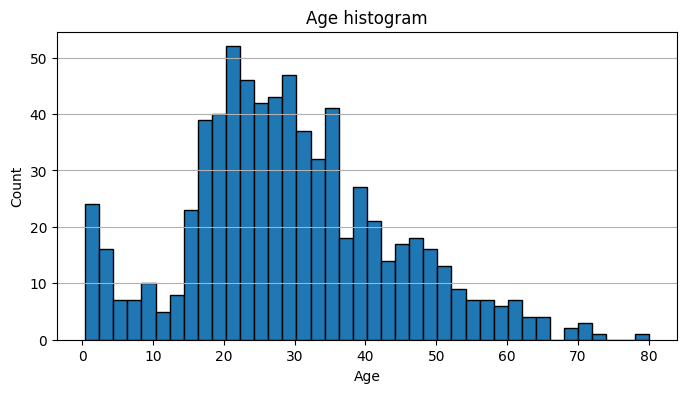

In [183]:
plt.figure(figsize=(8, 4))
plt.hist(data_set['Age'].dropna(), bins=40, edgecolor='black')
plt.title('Age histogram')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

2. Постройте гистограммы распределения цен для пассажиров разных классов

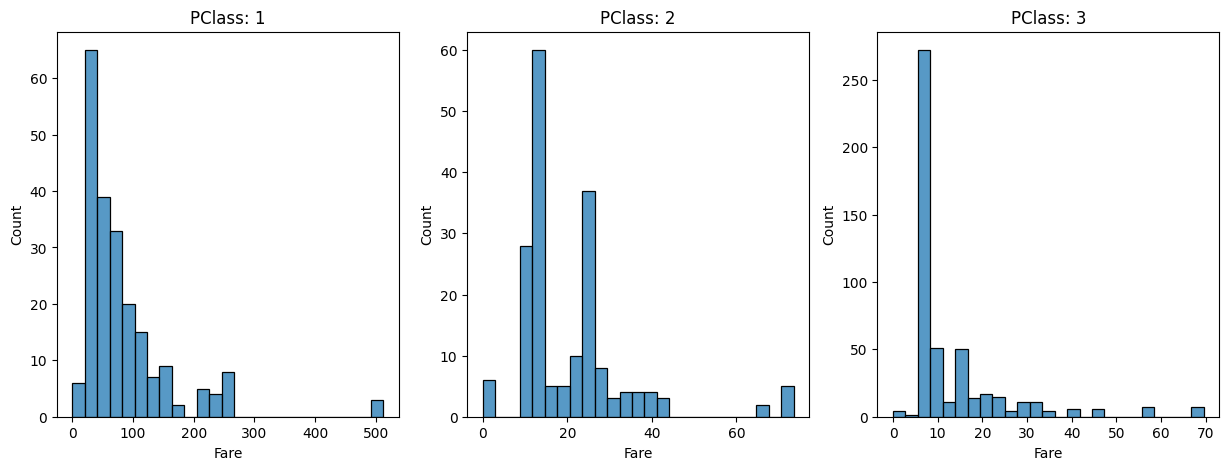

In [190]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

CurPClass = [1, 2, 3]
for cls, ax in zip(CurPClass, axes.flat):
    sns.histplot(
        data=data_set[data_set['Pclass'] == cls],
        x="Fare",
        ax=ax,
        bins=25
    )
    ax.set_title(f'PClass: {cls}')

plt.show()

3. Постройте зависимость цены от возраста пассажира

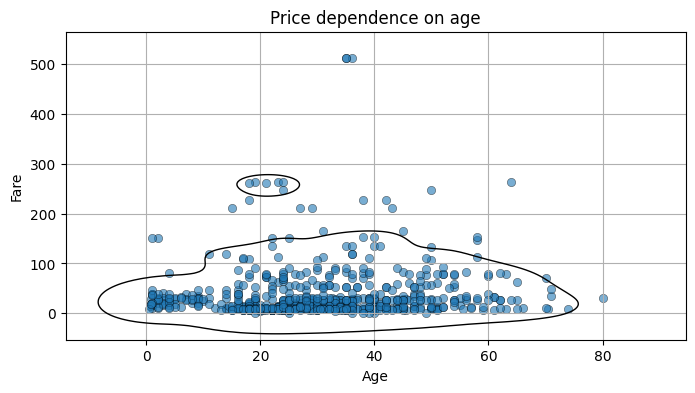

In [185]:
plt.figure(figsize=(8, 4))

sns.kdeplot(
    data=data_set,
    x='Age',
    y='Fare',
    levels=1,
    color='black',
    linewidths=1
)

sns.scatterplot(
    data=data_set,
    x='Age',
    y='Fare',
    alpha=0.6,
    edgecolor='black',
    linewidth=0.4
)

plt.title('Price dependence on age')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid()
plt.show()

4. Постройте box plot отображающий распределение цен на билеты в разных классах

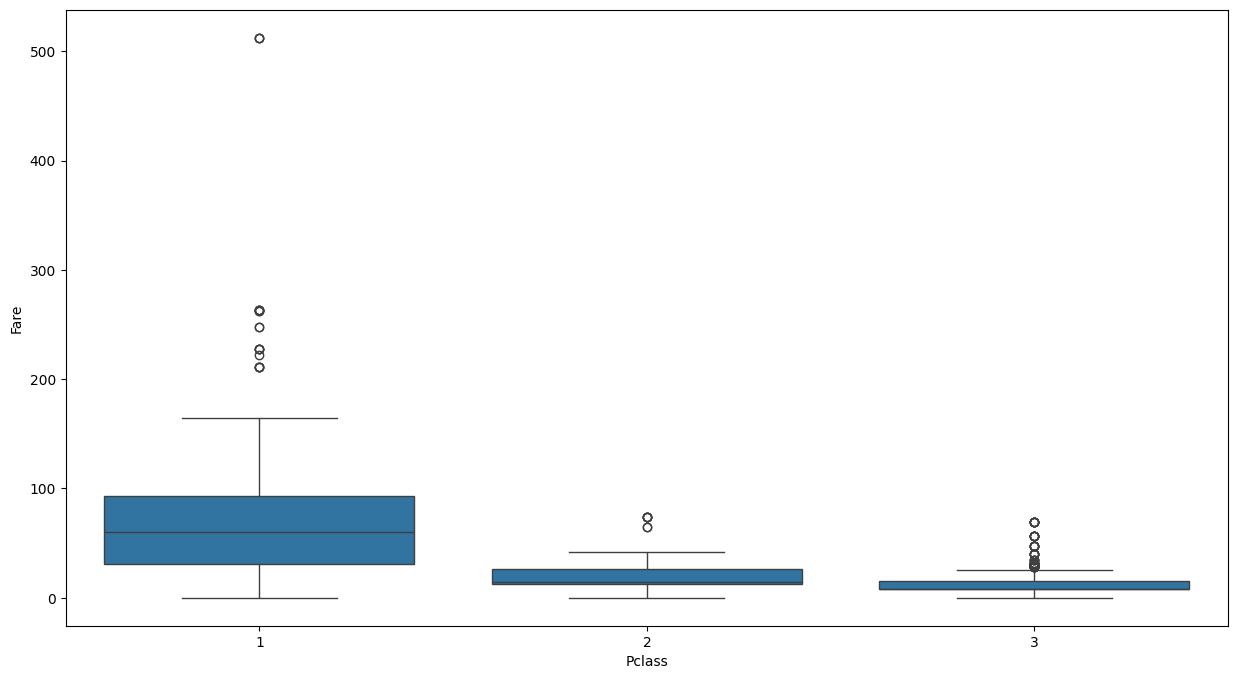

In [186]:
plt.figure(figsize=(15, 8))
sns.boxplot(
    data=data_set,
    x='Pclass',
    y='Fare',
)

plt.show()

5. Визуализируйте распределение долей выживших среди мужчин, женщин и детей(до 16 лет)

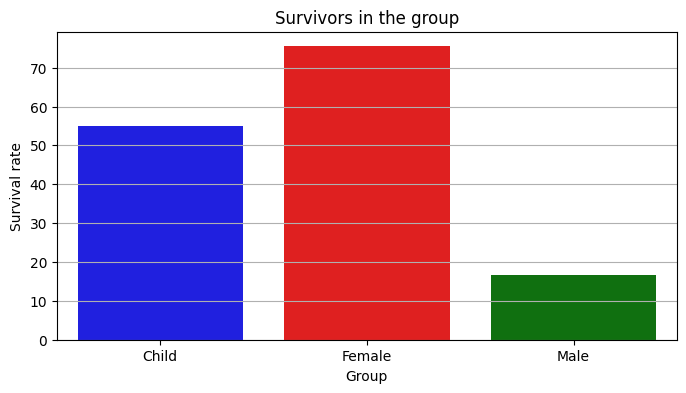

In [187]:
plt.figure(figsize=(8, 4))

survival = data_set.groupby(
    data_set.apply(
        lambda x: 'Child' if x['Age'] <= 16 else 'Male' if x['Sex'] == 'male' else 'Female', axis=1)
)['Survived'].mean() * 100

sns.barplot(
    x=survival.index,
    y=survival.values,
    hue=['Child', 'Female', 'Male'],
    palette={'Child': 'blue', 'Female': 'red', 'Male': 'green'}
)

plt.title('Survivors in the group')
plt.ylabel('Survival rate')
plt.xlabel('Group')
plt.grid(axis='y')
plt.show()


6. Сравните плотности распределения возростов выживших и умерших пассажиров, сделайте выводы

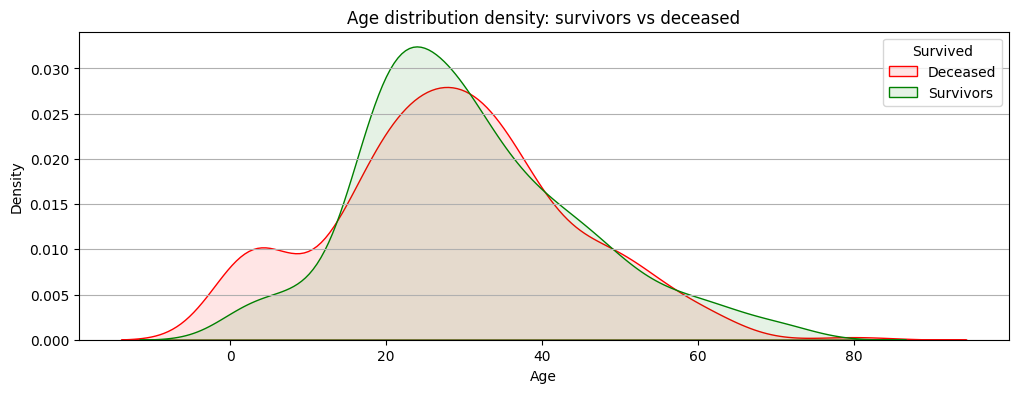

In [188]:
df_clean = data_set.dropna(subset=['Age'])

plt.figure(figsize=(12, 4))

sns.kdeplot(
    data=df_clean,
    x='Age',
    hue='Survived',
    fill=True,
    alpha=0.1,
    palette={0: 'green', 1: 'red'},
    common_norm=False
)

plt.title('Age distribution density: survivors vs deceased')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Survived', labels=['Deceased', 'Survivors'])
plt.grid(axis='y')
plt.show()

7. Постройте круговую диаграмму отображающую выживаемость мужчин и женщин в разных классах обслуживания(визуализация должна быть интуитивно понятная без объяснений, женщины и мужчины соответствующих классов объеденены визуально в одну группу и 2 подгруппы)*

\* Задание на доп. балл